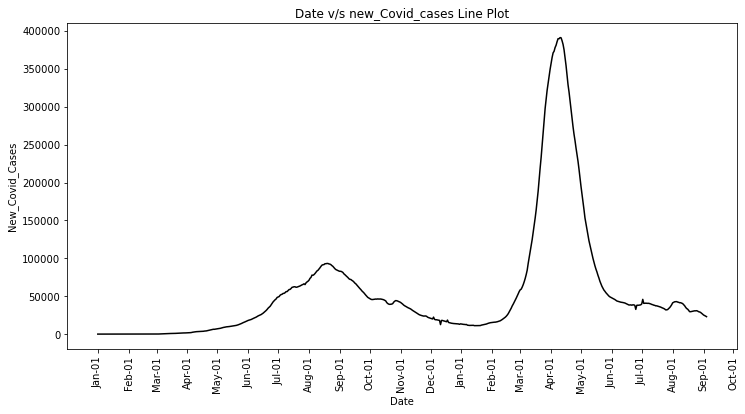

Part-B ---> 
Pearson correlation (autocorrelation) coefficient is:  0.9990644144715031
-------


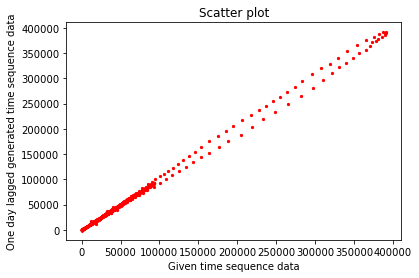

C:\Users\purib\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\purib\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


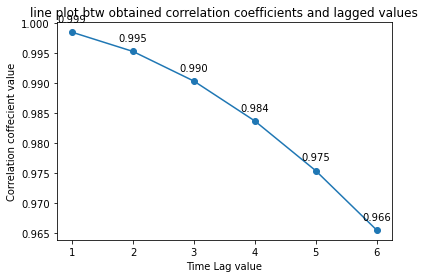

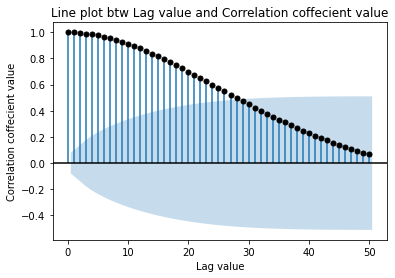

In [1]:
#author:brinda puri b20037 6239991708 
# Python code for Question-1 (Lab-6)

# import python libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import statsmodels.api as sm
from matplotlib.dates import DateFormatter
from statsmodels.graphics.tsaplots import plot_acf

# read the csv file using pandas library
data=pd.read_csv("C:/Users/purib/Downloads/daily_covid_cases.csv")

# store the original new cases data in the old_data variable
old_data=data['new_cases']

# Part-a
# plot the line of new covid cases v/s date
# set the axix value title and label with ax function
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data['Date'],data['new_cases'].values,color='black')
ax.set(xlabel="Date", ylabel="New_Covid_Cases",title="Date v/s new_Covid_cases Line Plot")
form_date = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(form_date)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation =90)
plt.show()

# Part-b
# find the Pearson correlation (autocorrelation) coefficient between orignal data and one day lagged data using corr function
print("Part-B ---> ")
lag1_data=old_data.shift(1)
print("Pearson correlation (autocorrelation) coefficient is: ",old_data.corr(lag1_data))
print("-------")

# Part-c
# Scatter plot of the orignal time series data and one day lagged data
plt.scatter(old_data, lag1_data, s=5, color="red")
plt.xlabel("Given time sequence data")
plt.ylabel("One day lagged generated time sequence data")
plt.title("Scatter plot")
plt.show()

# Part-d
# find the time lagged data series and it's correlation cofficient with original data
# plot the line graph between lag time and it's correlation cofficient
PCC=sm.tsa.acf(old_data)
lag_time=[1,2,3,4,5,6]
pcc=PCC[1:7]
plt.plot(lag_time,pcc, marker='o')
for xitem,yitem in np.nditer([lag_time, pcc]):
        etiqueta = "{:.3f}".format(yitem)
        plt.annotate(etiqueta, (xitem,yitem), textcoords="offset points",xytext=(0,10),ha="center")
plt.xlabel("Time Lag value")
plt.ylabel("Correlation coffecient value")
plt.title("line plot btw obtained correlation coefficients and lagged values")
plt.show()

# Part-e
# Plot Auto Correlation Function using python inbuilt function plot_acf
# plot the line diagram of correlation cofficient with respect to increase the time lag value
plot_acf(x=old_data, lags=50, color="black")
plt.xlabel("Lag value")
plt.ylabel("Correlation coffecient value")
plt.title("Line plot btw Lag value and Correlation coffecient value")
plt.show()

C:\Users\purib\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients of AR model are [ 5.9955e+01  1.0370e+00  2.6200e-01  2.8000e-02 -1.7500e-01 -1.5200e-01]


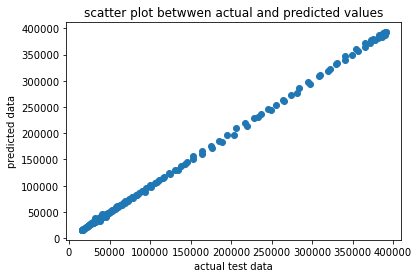

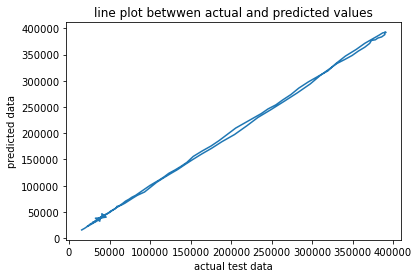

RMSE % is 1.8247684769390211
MAPE between actual and predicted data is 1.5748363824058185


In [2]:
#code for question2 lab6 
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg as AR
import math
import matplotlib.pyplot as plt


data = pd.read_csv('C:/Users/purib/Downloads/daily_covid_cases.csv',parse_dates=['Date'],index_col=['Date'],sep=',')

#a
test_size = 0.35
X = data.values

tst_siz = math.ceil(len(X)*test_size)
train,test = X[:len(X)-tst_siz],X[len(X)-tst_siz:]

#AR model
p=5
model = AR(train,lags=p)
model_fit = model.fit()   #fit train model
coef = model_fit.params   
r_coef = np.round(coef,3)
print(f'Coefficients of AR model are {r_coef}')
history = train[len(train)-p:]
history = [history[i] for i in range(len(history))]
predictions =[]

for i in range(len(test)):
    length = len(history)
    lag = [history[j] for j in range(length-p,length)]
    y_hat= coef[0]

    for d in range(p):
        y_hat += coef[d+1]*lag[p-d-1]    
    predictions.append(y_hat)
    obs = test[i]
    history.append(obs)


#i)
plt.scatter(test,predictions)
plt.xlabel('actual test data')
plt.ylabel('predicted data')
plt.title('scatter plot betwwen actual and predicted values')
plt.show()

#ii)
plt.plot(test,predictions)
plt.xlabel('actual test data')
plt.ylabel('predicted data')
plt.title('line plot betwwen actual and predicted values')
plt.show()

#iii)
n= len(test)
e = 0
for i in range(len(test)):
    e += (predictions[i]-test[i])**2      
RMSE = math.sqrt(e/n)
RMSE_per = (RMSE/test.mean())*100
print(f'RMSE % is {RMSE_per}')

#MAPE
s = 0
for i in range(len(test)):
    s += float(abs(test[i]-predictions[i])/test[i])
MAPE = (s/n)*100             
print(f'MAPE between actual and predicted data is {MAPE}')






C:\Users\purib\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\purib\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\purib\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\purib\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

RMSE value for lag = 1 is :  [5.37294849]
MAPE value for lag = 1 is :  3.4465401552089387
RMSE value for lag = 5 is :  [1.82476848]
MAPE value for lag = 5 is :  1.5748363824058185
RMSE value for lag = 10 is :  [1.68553193]
MAPE value for lag = 10 is :  1.5193699431086911
RMSE value for lag = 15 is :  [1.61193481]
MAPE value for lag = 15 is :  1.4962361178748627
RMSE value for lag = 25 is :  [1.70339141]
MAPE value for lag = 25 is :  1.5354207718257855


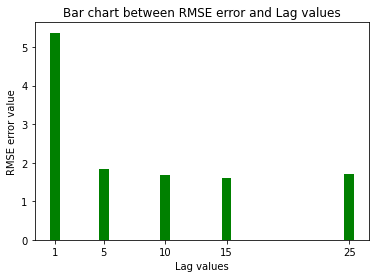

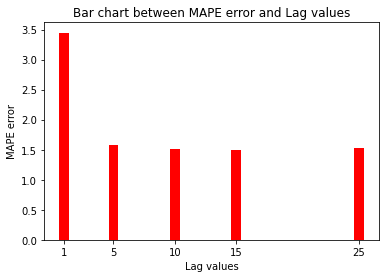

In [3]:
# Python code for Question-3 (Lab-6)

# import python libraries
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg as AR

# spilting the covid cases data into train (65%) and test data (35%)
series = pd.read_csv('C:/Users/purib/Downloads/daily_covid_cases.csv',parse_dates=['Date'],index_col=['Date'],sep=',')
train_size = 0.65
X = series.values
train, test = X[:int(len(X)*train_size)], X[int(len(X)*train_size):]

# define a AR mode for different test data, train data and lag value
def ARmodel(train_data, test_data, lag):
    window=lag
    model = AR(train_data, lags=window)
    # fit/train the model
    model_fit = model.fit()
    # Get the coefficients of AR model (w1,w2,w3......)
    coef = model_fit.params
    #using these coefficients walk forward over time steps in test, one step each time
    history = train_data[len(train_data)-window:]
    history = [history[i] for i in range(len(history))]
    # using these coefficients walk forward over time steps in test, one step each time
    predictions = list() 
    for t in range(len(test_data)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0] 
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test_data[t]
        # Append predictions to compute RMSE later
        predictions.append(yhat)
        # Append actual test value to history, to be used in next step
        history.append(obs)
    # find the rmse and mape value for different test data
    rmse_val=mean_squared_error(test_data, predictions,squared=False)*100/(sum(test_data)/len(test_data))
    s = 0
    for i in range(len(test_data)):
        s += float(abs(test_data[i]-predictions[i])/test[i])
    mape_val = (s/len(test_data))*100
    return rmse_val,mape_val

# store the given lag value in a list 
# create empty list to store RMSE and MAPE value
lag=[1,5,10,15,25]
rmse_li=[]
mape_li=[]
for i in lag:
    rmse,mape=ARmodel(train, test,i)
    print(f"RMSE value for lag = {i} is : ", rmse)
    print(f"MAPE value for lag = {i} is : ", mape)
    rmse_li.append(rmse[0])
    mape_li.append(mape)

# plot the Bar chart between RMSE error and Lag values
plt.bar(lag, rmse_li,color="green")
plt.ylabel('RMSE error value')
plt.xlabel('Lag values')
plt.title("Bar chart between RMSE error and Lag values")
plt.xticks(lag)
plt.show()

# plot the Bar chart between MAPE error and Lag values
plt.bar(lag, mape_li,color="red")
plt.ylabel('MAPE error')
plt.xlabel('Lag values')
plt.title("Bar chart between MAPE error and Lag values")
plt.xticks(lag)
plt.show()

In [4]:
#code for question 4 lab 6 
#importing required libraries
import pandas as pd
import math
import numpy as np
from statsmodels.tsa.ar_model import AutoReg as AR

data = pd.read_csv('C:/Users/purib/Downloads/daily_covid_cases.csv',parse_dates=['Date'],index_col=['Date'],sep=',')

test_size = 0.35
X = data.values
tst_sz = math.ceil(len(X)*test_size)
train, test = X[:len(X)-tst_sz], X[len(X)-tst_sz:]

test1 = pd.DataFrame(test,columns =['orig'])

cor=[]
b = (2/math.sqrt(len(train)))
print('Correlation coefficient:')
for i in range(1,101):
    name=f'lag{i}'
    data[name]=data['new_cases'].shift(i)
    a = np.abs(data['new_cases'].corr(data[name]))
    cor.append(a)
    
for i in range(100):
    if cor[i] > b:
        print(f'````` For {i+1}-day lag :',cor[i])
    else:
        print(f'@@@@@ For {i+1}-day lag :',cor[i])
  

p=47
model = AR(train, lags=p, old_names=False)
model_fit = model.fit()
coef = model_fit.params

hist = train[len(train)-p:]
hist = [hist[i] for i in range(len(hist))]

pred = []
for i in range(len(test)):
    y = coef[0]
    for t in range(p):
        y += coef[t+1] * hist[p-t-1]

    pred.append(y)
    hist.append(test[i])
    hist.pop(0)

n=0
m=0
d=0
for i in range(len(test)):
    n += (test[i]-pred[i])**2
    d += test[i]
    f = (test[i]-pred[i])/test[i]
    if f > 0:
        m += f
    else:
        m = m - f
n = (n/len(test))**0.5
d = d/len(test)
n = float(n/d)*100
m = float(m/len(test))*100

print('')
print(f'For lag = {p},\n RMSE(%) = {round(n,3)} \n MAPE = {round(m,3)}')

Correlation coefficient:
````` For 1-day lag : 0.9990644144715031
````` For 2-day lag : 0.996375107483936
````` For 3-day lag : 0.9919388573086093
````` For 4-day lag : 0.9857861789952967
````` For 5-day lag : 0.9779675657688203
````` For 6-day lag : 0.9685303994656104
````` For 7-day lag : 0.9575244210772659
````` For 8-day lag : 0.9450692238803443
````` For 9-day lag : 0.9311749971316445
````` For 10-day lag : 0.9159299717073591
````` For 11-day lag : 0.8994084415075124
````` For 12-day lag : 0.8816776249424482
````` For 13-day lag : 0.8628106277090846
````` For 14-day lag : 0.8428855782697827
````` For 15-day lag : 0.8219826280806573
````` For 16-day lag : 0.8001949544905023
````` For 17-day lag : 0.7776087988126276
````` For 18-day lag : 0.7543170848527615
````` For 19-day lag : 0.7304219930392477
````` For 20-day lag : 0.706027810479868
````` For 21-day lag : 0.6812337113473864
````` For 22-day lag : 0.6561424026627788
````` For 23-day lag : 0.630853974812134
````` For 24-day lag 